In [15]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix





In [2]:
data=pd.read_csv("D:\ML\ML Assignment\Food_Delivery_Time_Prediction.csv")
df=pd.DataFrame(data)
print(df.head)

<bound method NDFrame.head of     Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)     23.82   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)      6.09   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)     20.61   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)     24.06   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)      9.18   

    Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0       

In [3]:
print(df.isnull().sum())

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


In [4]:
print(df.columns)
df_encoded = pd.get_dummies(
    df, 
    columns=['Weather_Conditions', 'Traffic_Conditions'], 
    drop_first=True ,
    dtype=int 
)
print(df_encoded.columns)

x=df_encoded[["Distance","Weather_Conditions_Rainy","Weather_Conditions_Snowy",
              "Weather_Conditions_Sunny","Traffic_Conditions_Low",
              "Traffic_Conditions_Medium","Delivery_Time"]]
Model=KMeans(n_clusters=2,random_state=42)
Model.fit(x)




Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')
Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'Weather_Conditions_Rainy',
       'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium'],
      dtype='object')


,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


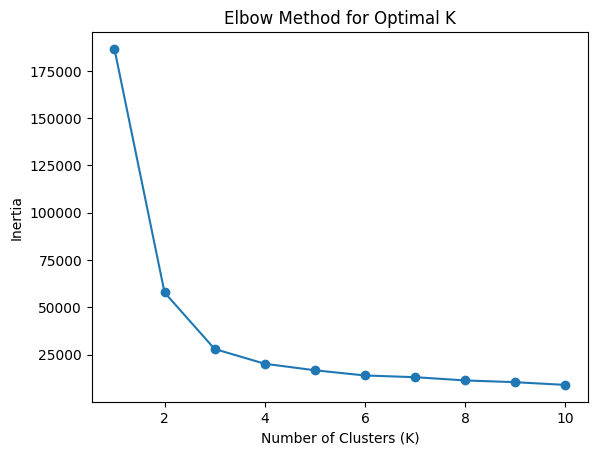

In [5]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [6]:
#Hierarchical Clustering
print(df.columns)
X=df_encoded[["Distance","Weather_Conditions_Rainy","Weather_Conditions_Snowy",
              "Weather_Conditions_Sunny","Traffic_Conditions_Low",
              "Traffic_Conditions_Medium","Delivery_Time"]]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

model=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
clusters=model.fit_predict(x_scaled)

#add cluster label to the dataset 
df['Cluster']=clusters
print(df["Cluster"])

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')
0      0
1      0
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    0
199    1
Name: Cluster, Length: 200, dtype: int64


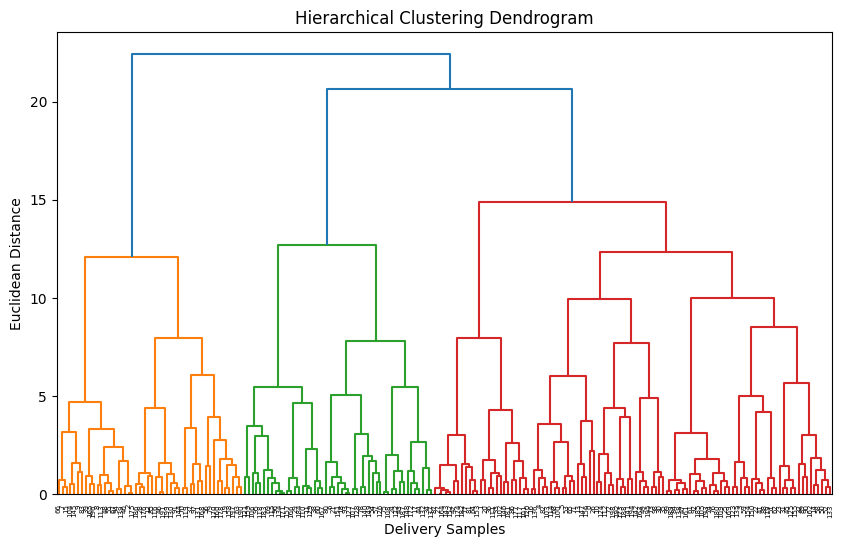

In [7]:
# Create the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method='ward'))

# Add titles and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Delivery Samples')
plt.ylabel('Euclidean Distance')
plt.show()

In [8]:
print(df_encoded.columns)

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'Weather_Conditions_Rainy',
       'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny',
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# --- Select Features and Target ---
X = df_encoded[["Distance", "Traffic_Conditions_Low", "Traffic_Conditions_Medium",
         "Weather_Conditions_Rainy", "Weather_Conditions_Snowy",
         "Weather_Conditions_Sunny",
         "Delivery_Person_Experience", "Customer_Rating"]]

y = df["Delivery_Time"]  # Assuming 'Delivery_Time' column is encoded as 0=Fast, 1=Delayed

# --- Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Build Feedforward Neural Network ---
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# --- Compile Model ---
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train Model ---
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# --- Evaluate Model ---
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# --- Optional: Predict ---
y_pred = (model.predict(X_test) > 0.5).astype("int32")


Epoch 1/50


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0000e+00 - loss: 2.8540 - val_accuracy: 0.0000e+00 - val_loss: -23.8808
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: -40.3714 - val_accuracy: 0.0000e+00 - val_loss: -64.3594
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -83.6028 - val_accuracy: 0.0000e+00 - val_loss: -114.3051
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -140.5373 - val_accuracy: 0.0000e+00 - val_loss: -183.1069
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: -221.6112 - val_accuracy: 0.0000e+00 - val_loss: -278.9585
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -336.7778 - val_accuracy: 0.0000e+00 - val_loss: -417.6720
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: -495.9957 - val_accuracy: 0.0000e+00 - val_loss: -609.2465
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━

Summary
K-Means clustering segments deliveries into groups based on distance, traffic, and weather, revealing patterns like consistently fast or frequently delayed deliveries. Hierarchical clustering shows relationships between deliveries, helping identify outliers and nested similarities. Together, these insights can improve delivery prediction by using cluster information to allocate resources, optimize routes, and proactively manage high-risk deliveries.